In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from my_help_functions.plot import plot_loss, plot_metric
from my_help_functions.seq import vectorize_sequences

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [4]:
# Подготовка данных
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [5]:
# Проверочный набор
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [6]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"]
             )

2024-02-25 20:41:51.069767: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-02-25 20:41:51.069793: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-02-25 20:41:51.069797: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-02-25 20:41:51.069826: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-25 20:41:51.069844: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
 1/16 [>.............................] - ETA: 5s - loss: 3.8141 - accuracy: 0.0469

2024-02-25 20:41:51.499038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 22ms/step - loss: 2.4582 - accuracy: 0.5486 - val_loss: 1.6748 - val_accuracy: 0.6370
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.3695 - accuracy: 0.7140 - val_loss: 1.2852 - val_accuracy: 0.7240
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.0203 - accuracy: 0.7913 - val_loss: 1.1302 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.8076 - accuracy: 0.8335 - val_loss: 1.0255 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6419 - accuracy: 0.8691 - val_loss: 0.9442 - val_accuracy: 0.8100
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5142 - accuracy: 0.8931 - val_loss: 0.9287 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4118 - accuracy: 0.9156 - val_loss: 0.9189 - val_accuracy: 0.8170
Epoch 8/20
16/16 [======

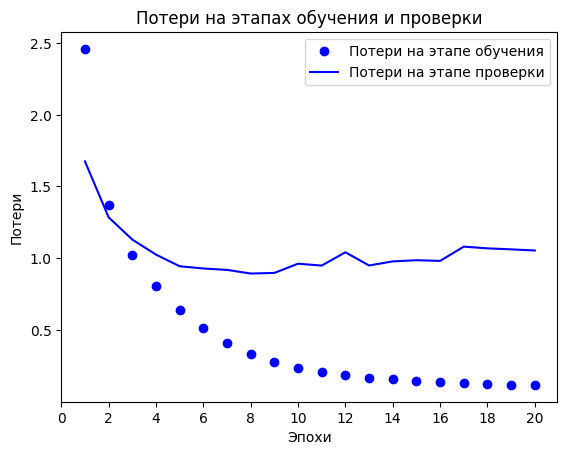

In [8]:
plot_loss(history)

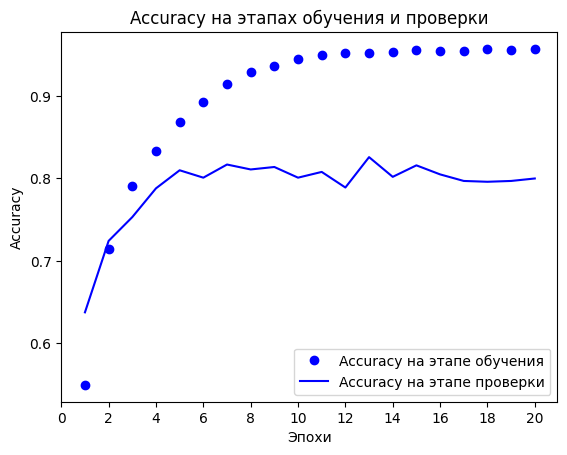

In [9]:
plot_metric(history, 'accuracy', 'Accuracy')

In [15]:
# Обучение новой модели

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"]
             )
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512
         )
results = model.evaluate(x_test, y_test)

print(f'\nAccuracy on test: {results[1]}')

Epoch 1/9
18/18 [==============================] - 0s 13ms/step - loss: 2.4031 - accuracy: 0.5412
Epoch 2/9
18/18 [==============================] - 0s 11ms/step - loss: 1.3300 - accuracy: 0.7172
Epoch 3/9
18/18 [==============================] - 0s 11ms/step - loss: 0.9809 - accuracy: 0.7875
Epoch 4/9
18/18 [==============================] - 0s 12ms/step - loss: 0.7661 - accuracy: 0.8389
Epoch 5/9
18/18 [==============================] - 0s 12ms/step - loss: 0.6036 - accuracy: 0.8769
Epoch 6/9
18/18 [==============================] - 0s 12ms/step - loss: 0.4834 - accuracy: 0.9039
Epoch 7/9
18/18 [==============================] - 0s 11ms/step - loss: 0.3909 - accuracy: 0.9232
Epoch 8/9
18/18 [==============================] - 0s 11ms/step - loss: 0.3224 - accuracy: 0.9354
Epoch 9/9
71/71 [==============================] - 1s 6ms/step - loss: 0.9474 - accuracy: 0.7996

Accuracy on test: 0.7996438145637512


In [19]:
# Другой способ обработки меток 
# Оставить как есть и использовать sparse_categorical_crossentropy

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [20]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [22]:
model.fit(x_train,
          y_train,
          epochs=7,
          batch_size=512
         )
results = model.evaluate(x_test, y_test)

print(f'\nAccuracy on test: {results[1]}')

Epoch 1/7
18/18 [==============================] - 0s 8ms/step - loss: 0.1264 - accuracy: 0.9554
Epoch 2/7
18/18 [==============================] - 0s 8ms/step - loss: 0.1189 - accuracy: 0.9547
Epoch 3/7
18/18 [==============================] - 0s 8ms/step - loss: 0.1146 - accuracy: 0.9541
Epoch 4/7
18/18 [==============================] - 0s 8ms/step - loss: 0.1161 - accuracy: 0.9560
Epoch 5/7
18/18 [==============================] - 0s 8ms/step - loss: 0.1109 - accuracy: 0.9569
Epoch 6/7
18/18 [==============================] - 0s 8ms/step - loss: 0.1128 - accuracy: 0.9541
Epoch 7/7
71/71 [==============================] - 0s 4ms/step - loss: 1.2553 - accuracy: 0.7943

Accuracy on test: 0.7943009734153748


In [24]:
# Слой 32
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512
         )
results = model.evaluate(x_test, y_test)

print(f'\nAccuracy on test: {results[1]}')

Epoch 1/9
18/18 [==============================] - 1s 20ms/step - loss: 2.7708 - accuracy: 0.4785
Epoch 2/9
18/18 [==============================] - 0s 8ms/step - loss: 1.7846 - accuracy: 0.6333
Epoch 3/9
18/18 [==============================] - 0s 8ms/step - loss: 1.3677 - accuracy: 0.7110
Epoch 4/9
18/18 [==============================] - 0s 8ms/step - loss: 1.1228 - accuracy: 0.7583
Epoch 5/9
18/18 [==============================] - 0s 8ms/step - loss: 0.9509 - accuracy: 0.7976
Epoch 6/9
18/18 [==============================] - 0s 8ms/step - loss: 0.8136 - accuracy: 0.8322
Epoch 7/9
18/18 [==============================] - 0s 8ms/step - loss: 0.6993 - accuracy: 0.8562
Epoch 8/9
18/18 [==============================] - 0s 8ms/step - loss: 0.6033 - accuracy: 0.8799
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 1.0083 - accuracy: 0.7832

Accuracy on test: 0.7831701040267944


In [25]:
# Слой 128
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512
         )
results = model.evaluate(x_test, y_test)

print(f'\nAccuracy on test: {results[1]}')

Epoch 1/9
18/18 [==============================] - 1s 15ms/step - loss: 1.9907 - accuracy: 0.5897
Epoch 2/9
18/18 [==============================] - 0s 9ms/step - loss: 1.0698 - accuracy: 0.7745
Epoch 3/9
18/18 [==============================] - 0s 8ms/step - loss: 0.7435 - accuracy: 0.8490
Epoch 4/9
18/18 [==============================] - 0s 8ms/step - loss: 0.5288 - accuracy: 0.8914
Epoch 5/9
18/18 [==============================] - 0s 8ms/step - loss: 0.3843 - accuracy: 0.9189
Epoch 6/9
18/18 [==============================] - 0s 8ms/step - loss: 0.3096 - accuracy: 0.9324
Epoch 7/9
18/18 [==============================] - 0s 8ms/step - loss: 0.2455 - accuracy: 0.9433
Epoch 8/9
18/18 [==============================] - 0s 9ms/step - loss: 0.2086 - accuracy: 0.9483
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 1.0248 - accuracy: 0.8054

Accuracy on test: 0.8054319024085999


In [26]:
# Слой 128 и 3
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512
         )
results = model.evaluate(x_test, y_test)

print(f'\nAccuracy on test: {results[1]}')

Epoch 1/9
18/18 [==============================] - 1s 13ms/step - loss: 1.9428 - accuracy: 0.5731
Epoch 2/9
18/18 [==============================] - 0s 9ms/step - loss: 1.1086 - accuracy: 0.7494
Epoch 3/9
18/18 [==============================] - 0s 9ms/step - loss: 0.7935 - accuracy: 0.8258
Epoch 4/9
18/18 [==============================] - 0s 9ms/step - loss: 0.5860 - accuracy: 0.8770
Epoch 5/9
18/18 [==============================] - 0s 9ms/step - loss: 0.4209 - accuracy: 0.9093
Epoch 6/9
18/18 [==============================] - 0s 9ms/step - loss: 0.3210 - accuracy: 0.9286
Epoch 7/9
18/18 [==============================] - 0s 10ms/step - loss: 0.2483 - accuracy: 0.9430
Epoch 8/9
18/18 [==============================] - 0s 10ms/step - loss: 0.2120 - accuracy: 0.9481
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 1.0950 - accuracy: 0.8001

Accuracy on test: 0.8000890612602234


In [30]:
# Слой 128 и 1
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )
model.fit(x_train,
          y_train,
          epochs=8,
          batch_size=512
         )
results = model.evaluate(x_test, y_test)

print(f'\nAccuracy on test: {results[1]}')

Epoch 1/8
18/18 [==============================] - 1s 13ms/step - loss: 2.0739 - accuracy: 0.6141
Epoch 2/8
18/18 [==============================] - 0s 7ms/step - loss: 1.0635 - accuracy: 0.7884
Epoch 3/8
18/18 [==============================] - 0s 9ms/step - loss: 0.7338 - accuracy: 0.8570
Epoch 4/8
18/18 [==============================] - 0s 7ms/step - loss: 0.5400 - accuracy: 0.8962
Epoch 5/8
18/18 [==============================] - 0s 7ms/step - loss: 0.4121 - accuracy: 0.9183
Epoch 6/8
18/18 [==============================] - 0s 7ms/step - loss: 0.3246 - accuracy: 0.9323
Epoch 7/8
18/18 [==============================] - 0s 7ms/step - loss: 0.2639 - accuracy: 0.9404
Epoch 8/8
71/71 [==============================] - 0s 4ms/step - loss: 0.8661 - accuracy: 0.8081

Accuracy on test: 0.8081033229827881


In [28]:
# Слой 256 и 1
model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512
         )
results = model.evaluate(x_test, y_test)

print(f'\nAccuracy on test: {results[1]}')

Epoch 1/9
18/18 [==============================] - 1s 13ms/step - loss: 1.7756 - accuracy: 0.6458
Epoch 2/9
18/18 [==============================] - 0s 8ms/step - loss: 0.8241 - accuracy: 0.8362
Epoch 3/9
18/18 [==============================] - 0s 8ms/step - loss: 0.5364 - accuracy: 0.8957
Epoch 4/9
18/18 [==============================] - 0s 9ms/step - loss: 0.3806 - accuracy: 0.9248
Epoch 5/9
18/18 [==============================] - 0s 10ms/step - loss: 0.2866 - accuracy: 0.9384
Epoch 6/9
18/18 [==============================] - 0s 8ms/step - loss: 0.2326 - accuracy: 0.9446
Epoch 7/9
18/18 [==============================] - 0s 8ms/step - loss: 0.1956 - accuracy: 0.9499
Epoch 8/9
18/18 [==============================] - 0s 8ms/step - loss: 0.1728 - accuracy: 0.9529
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 1.0116 - accuracy: 0.7965

Accuracy on test: 0.7965271472930908


In [32]:
# Слой 256 и 1
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512
         )
results = model.evaluate(x_test, y_test)

print(f'\nAccuracy on test: {results[1]}')

Epoch 1/9
18/18 [==============================] - 1s 13ms/step - loss: 2.1308 - accuracy: 0.5863
Epoch 2/9
18/18 [==============================] - 0s 8ms/step - loss: 1.1406 - accuracy: 0.7682
Epoch 3/9
18/18 [==============================] - 0s 8ms/step - loss: 0.8002 - accuracy: 0.8411
Epoch 4/9
18/18 [==============================] - 0s 8ms/step - loss: 0.5888 - accuracy: 0.8840
Epoch 5/9
18/18 [==============================] - 0s 9ms/step - loss: 0.4367 - accuracy: 0.9135
Epoch 6/9
18/18 [==============================] - 0s 8ms/step - loss: 0.3374 - accuracy: 0.9297
Epoch 7/9
18/18 [==============================] - 0s 8ms/step - loss: 0.2740 - accuracy: 0.9402
Epoch 8/9
18/18 [==============================] - 0s 8ms/step - loss: 0.2297 - accuracy: 0.9475
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9759 - accuracy: 0.8032

Accuracy on test: 0.8032057285308838
